In [11]:
from modules.algorithms import UtilityMatrix
from modules.agents import User
from modules.simulator import Simulator
from modules.rewards import RewardFunctionExponential, RewardFunctionSquaredExponential
from modules.samplersRecommendation import UniformSamplerRecommendation, GaussianSamplerRecommendation
from modules.parameters import ParametersUser, ParametersPopulation
from modules.utils import Opinion

Define parameters

In [12]:
reward = RewardFunctionSquaredExponential(decay_parameter=1.0)
recommendation_sampler = UniformSamplerRecommendation(low=-1.0, high=1.0)

parameters = ParametersUser(prejudice=Opinion(0.0),
                            weight_prejudice=0.2,
                            weight_recommendation=0.3,
                            weight_current_opinion=0.5,
                            reward=reward)

Define a user and algorithm

In [13]:
user = User(initial_state=Opinion(0.0),
            parameters=parameters,
            save_history=True)

alg = UtilityMatrix(n_agents=1,
                    recommendation_sampler=recommendation_sampler,
                    exploration_probability=0.0, # probability of exploring at every time step
                    exploration_frequency=10) # force exploration every exploration_frequency steps

In [14]:
# Simulation
simulator = Simulator(agent=user,
                      algorithm=alg)

# Run
simulator.run(horizon=1000)

Plot all results

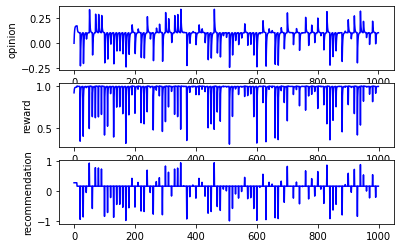

In [15]:
# Plot
simulator.agent.plot(save=False)